In [1]:
#Packages needed

import  cv2
import numpy as np
from deepface import DeepFace
import matplotlib.pyplot as plt
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haaarcascade_frontalface_default.xml')
import pandas as pd

df = pd.read_csv('top2018.csv')
df.drop(df.columns.difference(['id','name', 'artist', 'tempo']), 1, inplace=True)
df

,id,name
0,6DCZcSspjsKoFjzjrWoCd,God's Plan
1,3ee8Jmje8o58CHK66QrVC,SAD!
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage)
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign)
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings
...,...,...
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels)
97,5WvAo7DNuPRmk4APhdPzi,No Brainer
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit


opencv_frame_0.png written!
opencv_frame_1.png written!
opencv_frame_2.png written!
opencv_frame_3.png written!
Escape hit, closing...


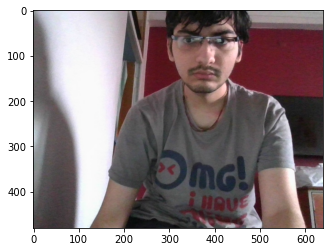

In [2]:
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()
img = cv2.imread('opencv_frame_0.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
predictions = DeepFace.analyze(img)
predictions

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.77s/it]


{'region': {'x': 298, 'y': 10, 'w': 174, 'h': 174},
 'emotion': {'angry': 9.834561496973038,
  'disgust': 0.0013028576177021023,
  'fear': 2.3953264579176903,
  'happy': 0.23562205024063587,
  'sad': 2.2719619795680046,
  'surprise': 5.8183703571558,
  'neutral': 79.44285869598389},
 'dominant_emotion': 'neutral',
 'age': 29,
 'gender': 'Man',
 'race': {'asian': 5.489668159445305,
  'indian': 84.36105064881451,
  'black': 1.5457685085557114,
  'white': 0.5205880539820259,
  'middle eastern': 0.3430084734271137,
  'latino hispanic': 7.739921091785561},
 'dominant_race': 'indian'}

In [4]:
emotion = predictions['dominant_emotion']
print(emotion)

neutral


In [5]:
import random

if (emotion == 'happy'):
    n = random.randint(0,12)
    print(df.loc[[n]])
elif (emotion == 'angry'):
    n = random.randint(13,23)
    print(df.loc[[n]])
elif (emotion == 'sad'):
    n = random.randint(24,40)
    print(df.loc[[n]])
elif (emotion == 'neutral'):
    n = random.randint(40,54)
    print(df.loc[[n]])
elif (emotion == 'surprise'):
    n = random.randint(55,70)
    print(df.loc[[n]])
elif (emotion == 'disgust'):
    n = random.randint(71,91)
    print(df.loc[[n]])
else:
    n = random.randint(92,101)
    print(df.loc[[n]])

                       id                             name
50  7sO5G9EABYOXQKNPNiE9N  Ric Flair Drip (& Metro Boomin)
